Nozzle Details
Nozzle Radius: 0.001 m
Nozzle Throat Radius: 0.005 m

Grain Details
Number of Grains: 4
Grain Spacing: 0 m
Grain Density: 1000 kg/m3
Grain Outer Radius: 0.01 m
Grain Inner Radius: 0.005 m
Grain Height: 0.05 m
Grain Volume: 0.000 m3
Grain Mass: 0.012 kg

Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 0.047 kg
Average Propellant Exhaust Velocity: 4010.901 m/s
Average Thrust: 48.464 N
Maximum Thrust: 103.55 N at 0.503 s after ignition.
Total Impulse: 189.009 Ns



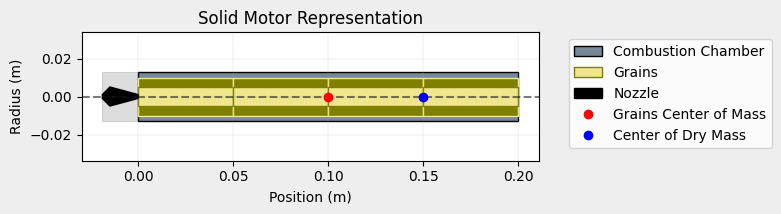

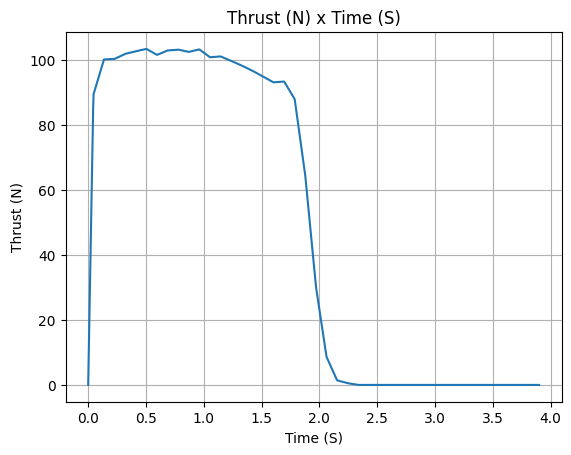

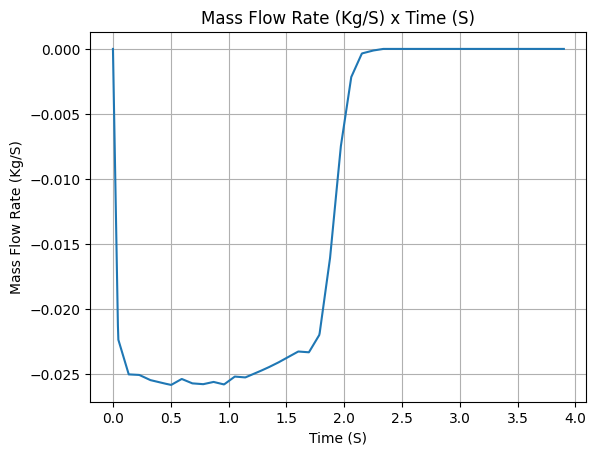

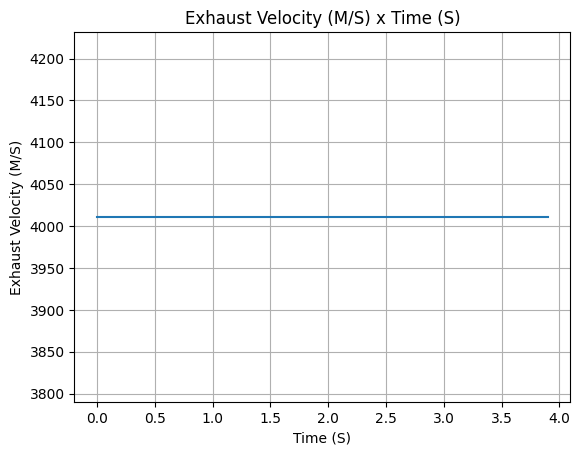

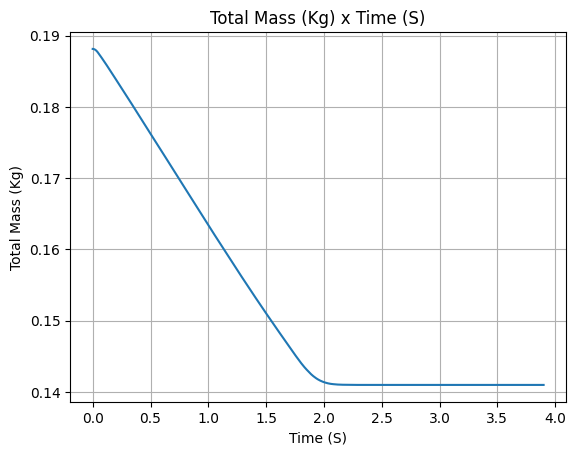

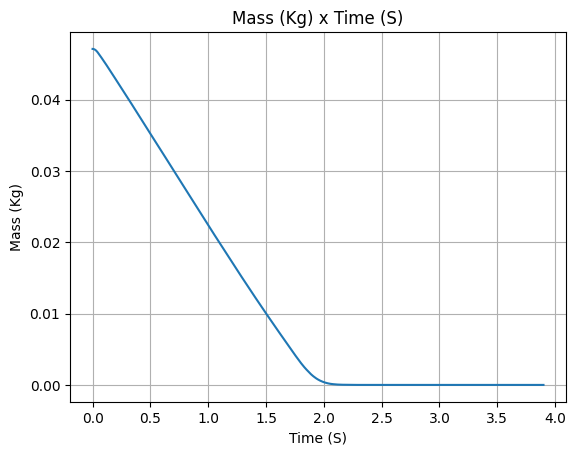

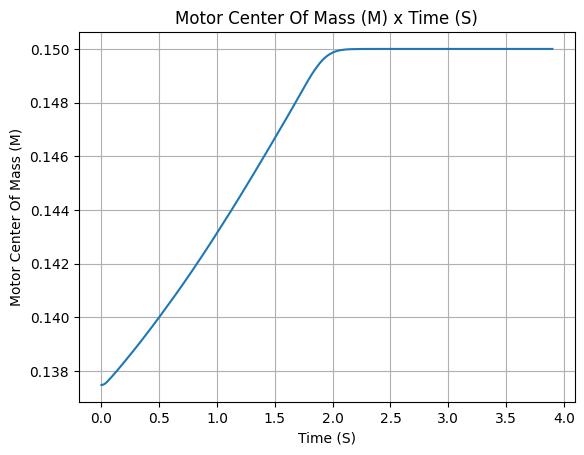

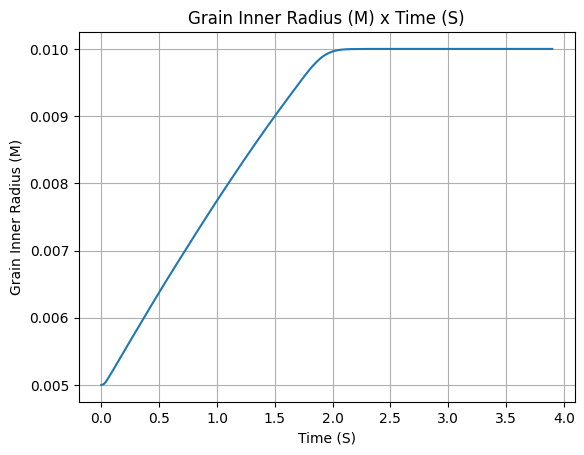

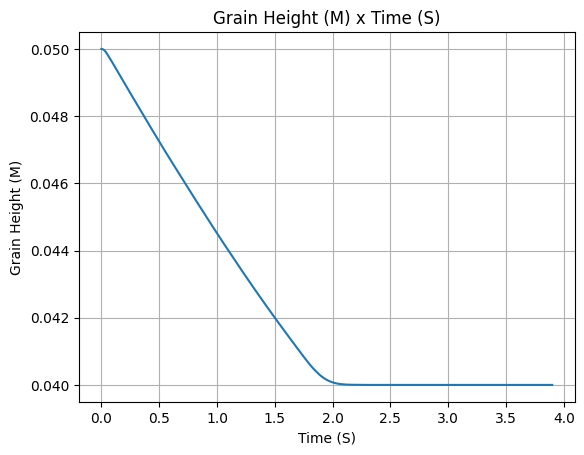

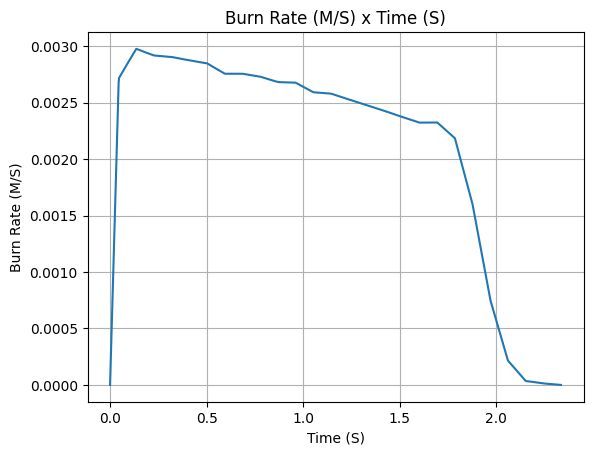

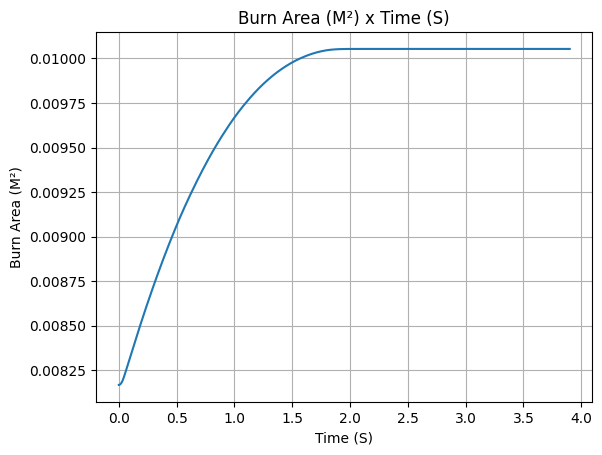

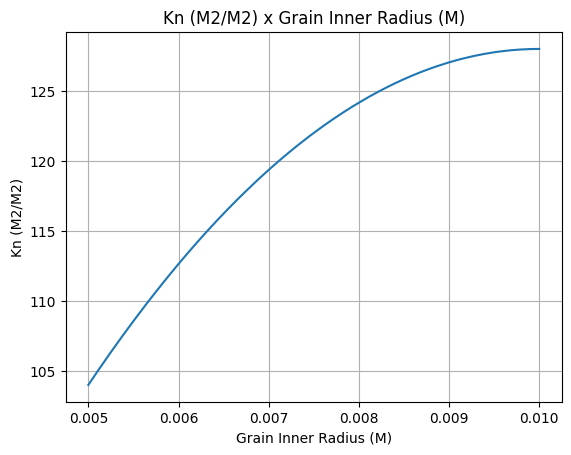

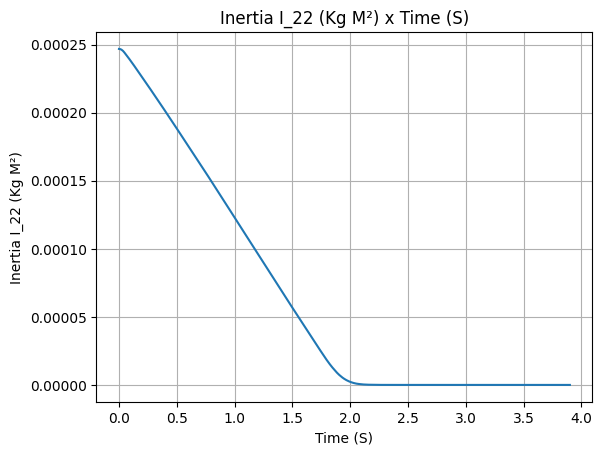

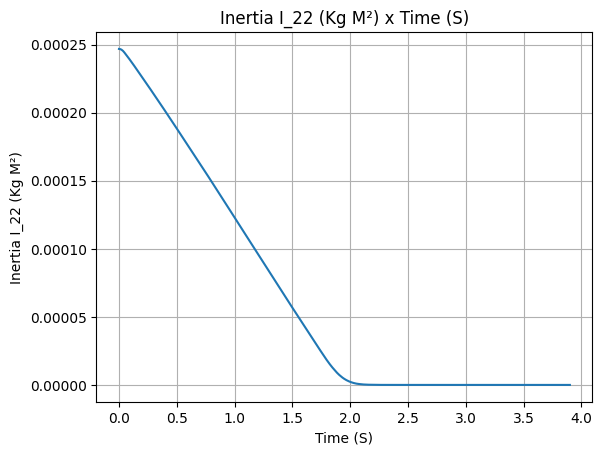

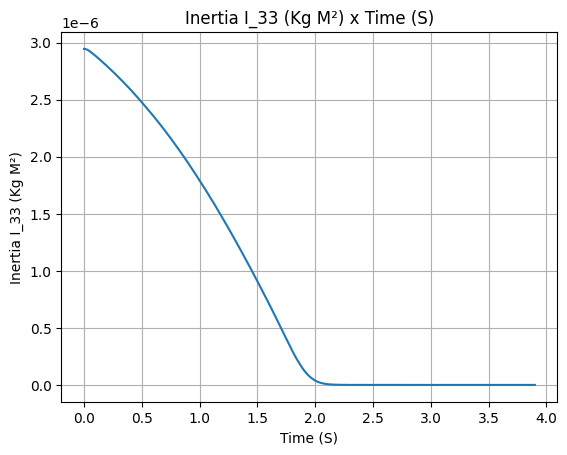

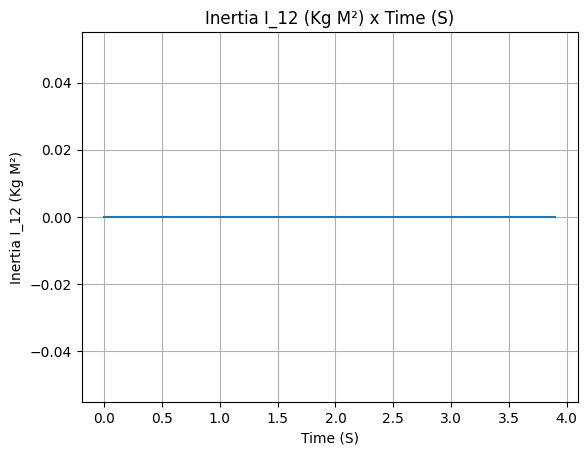

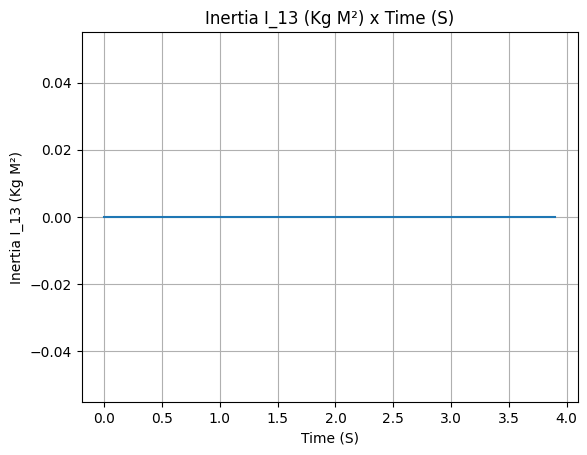

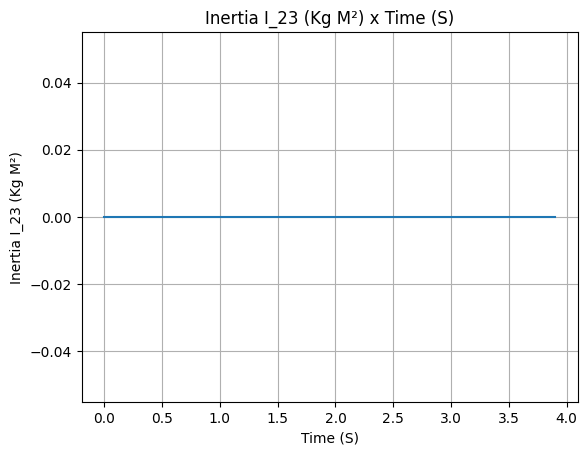


Inertia Details

Rocket Mass: 1.464 kg (without motor)
Rocket Dry Mass: 1.605 kg (with unloaded motor)
Rocket Loaded Mass: 1.652 kg (with loaded motor)
Rocket Inertia (with unloaded motor) 11: 3.343 kg*m2
Rocket Inertia (with unloaded motor) 22: 4.343 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.024 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.0381 m
Rocket Frontal Area: 0.004560 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.036 m
Rocket Center of Dry Mass - Nozzle Exit: 0.529 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.429 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.012 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 4.919/rad

Center of Pressure

Nose Cone Center of Pr

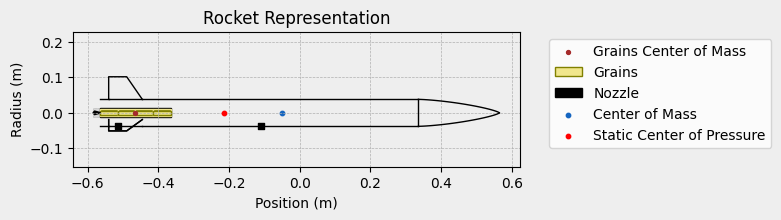


Mass Plots
----------------------------------------


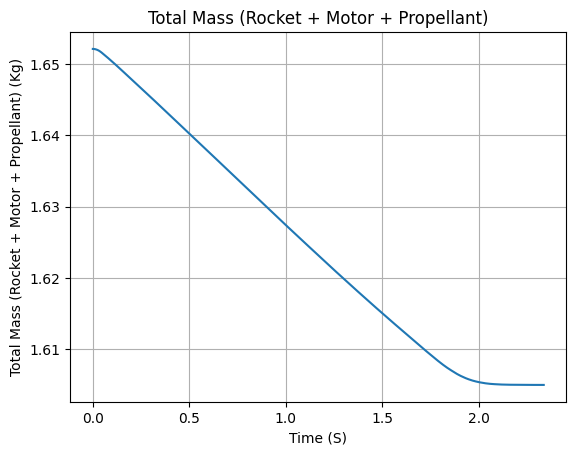

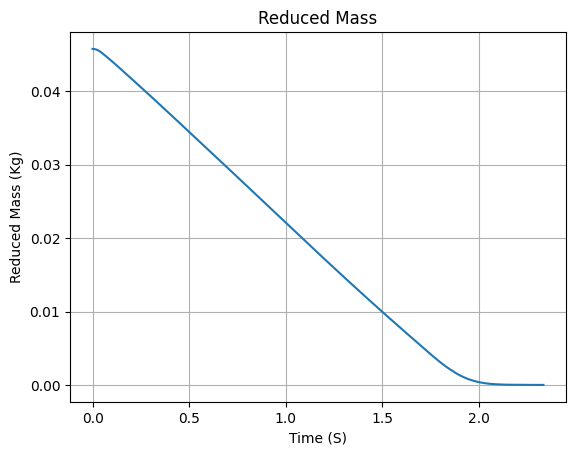


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


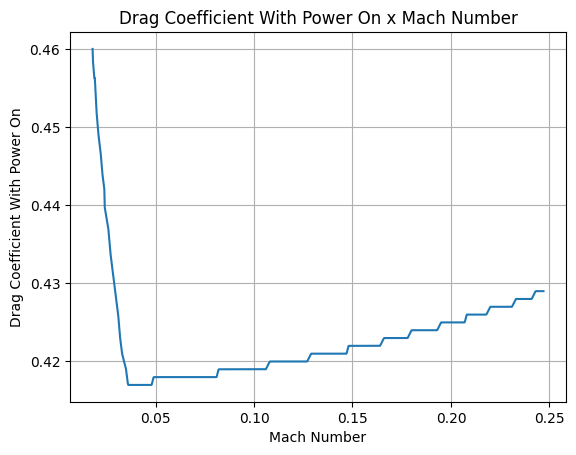

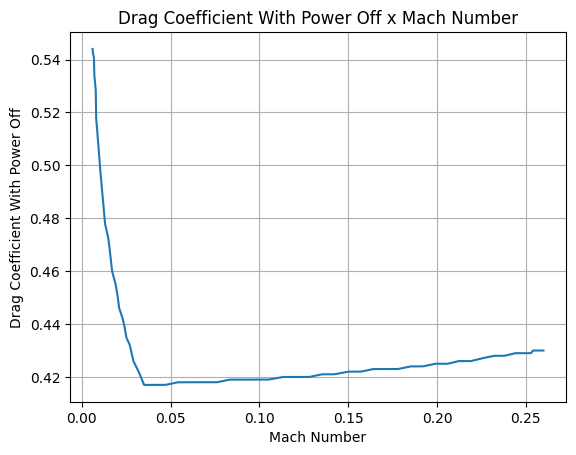


Stability Plots
--------------------


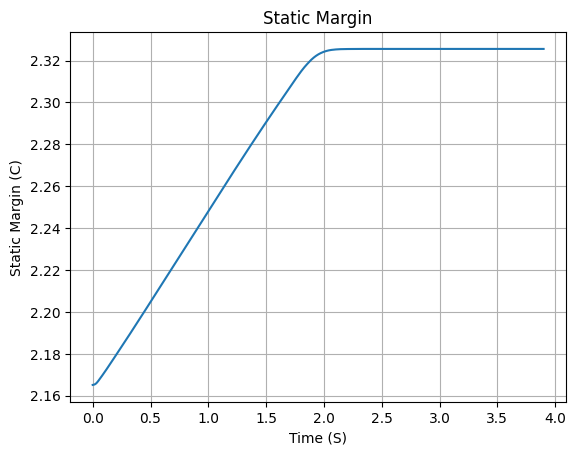

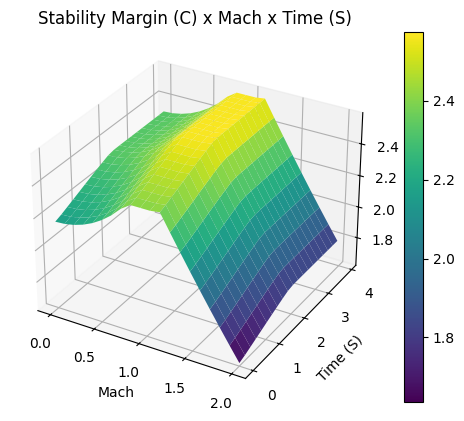


Thrust-to-Weight Plot
----------------------------------------


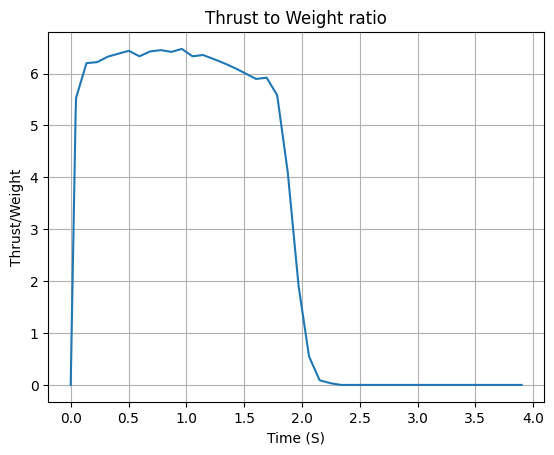

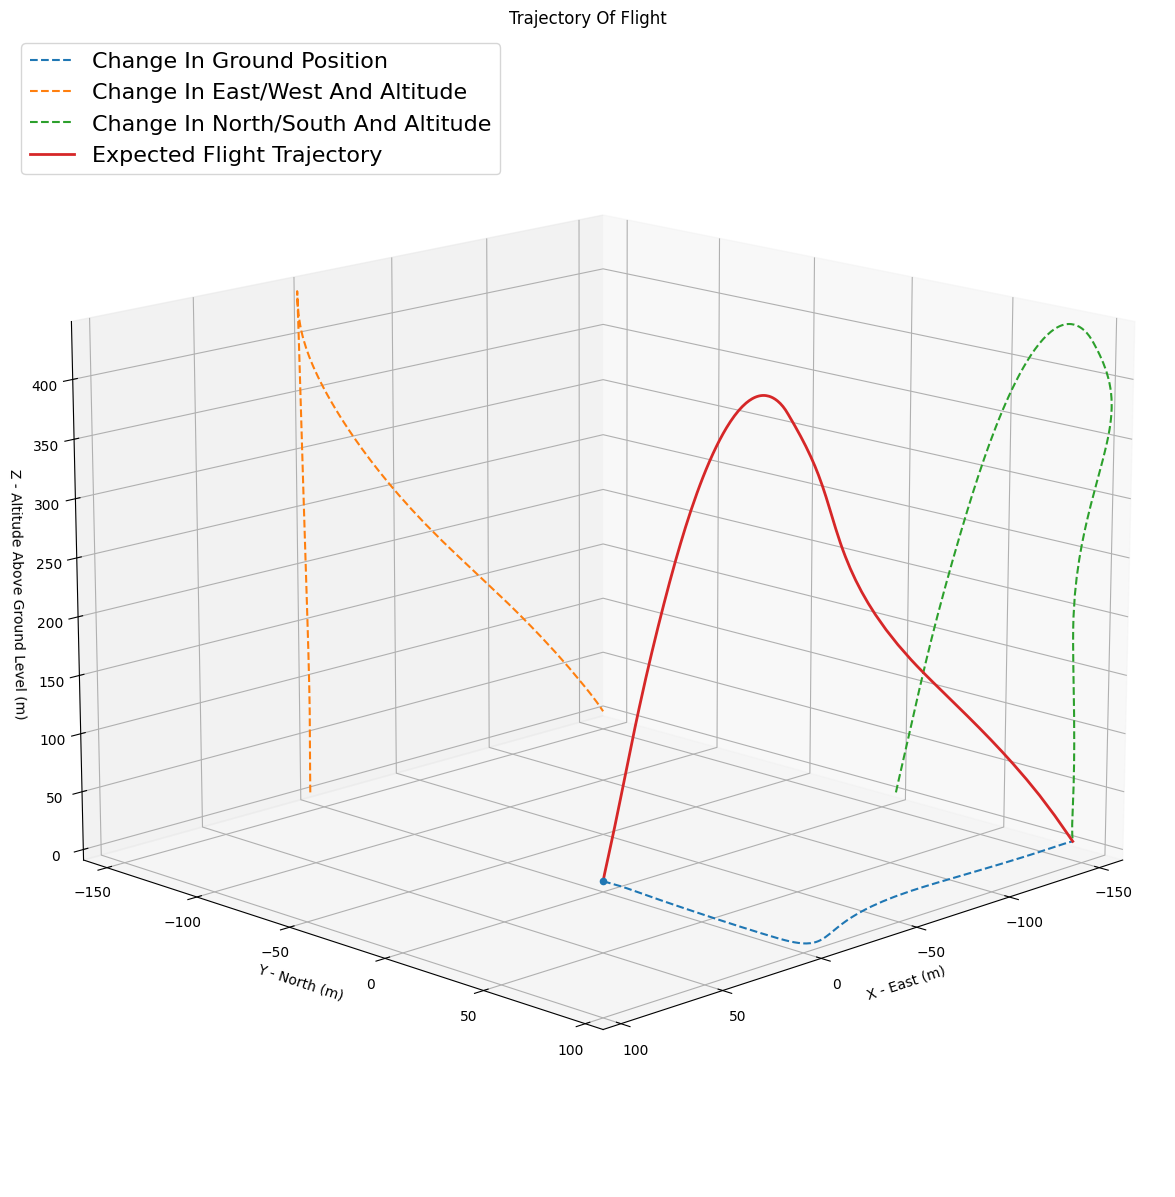

Nozzle Details
Nozzle Radius: 0.001 m
Nozzle Throat Radius: 0.005 m

Grain Details
Number of Grains: 4
Grain Spacing: 0 m
Grain Density: 1000 kg/m3
Grain Outer Radius: 0.01 m
Grain Inner Radius: 0.005 m
Grain Height: 0.05 m
Grain Volume: 0.000 m3
Grain Mass: 0.012 kg

Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 0.047 kg
Average Propellant Exhaust Velocity: 4010.901 m/s
Average Thrust: 48.464 N
Maximum Thrust: 103.55 N at 0.503 s after ignition.
Total Impulse: 189.009 Ns



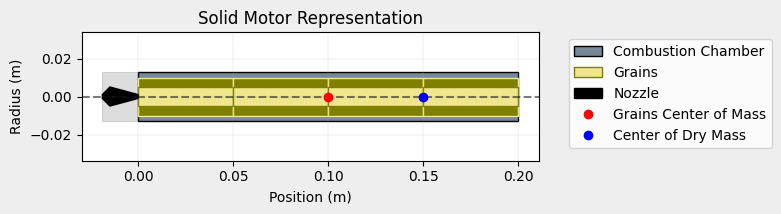

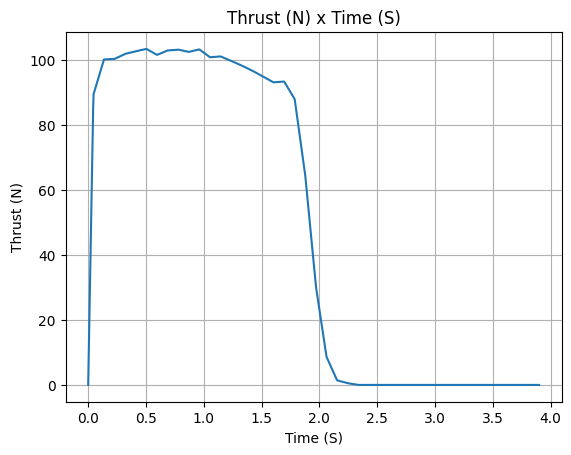

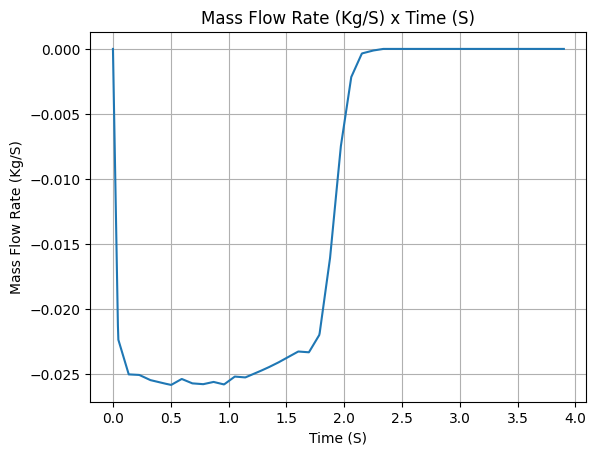

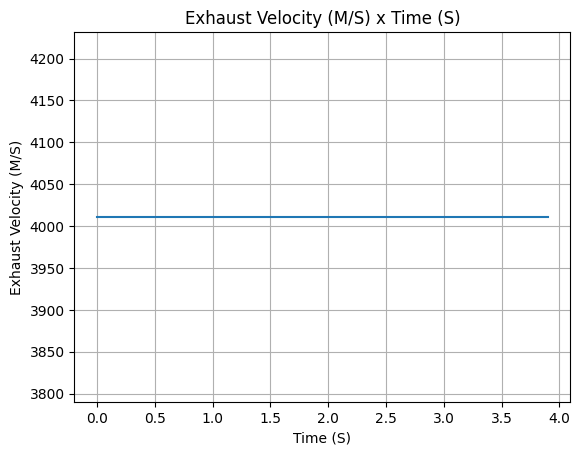

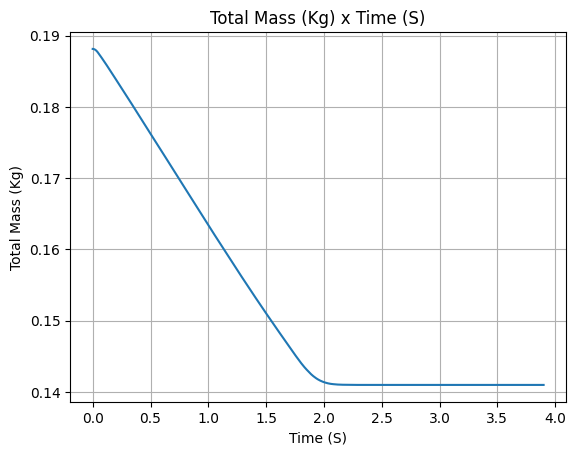

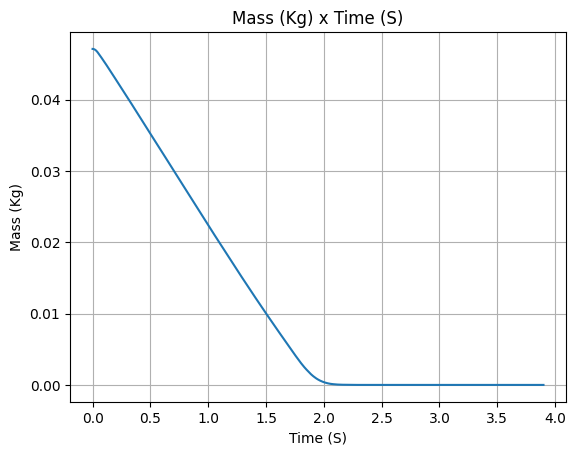

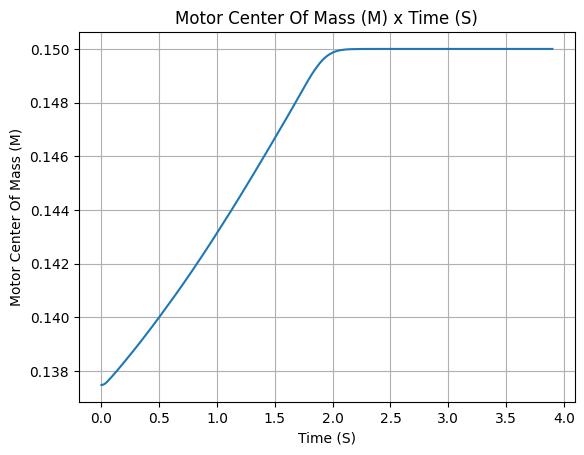

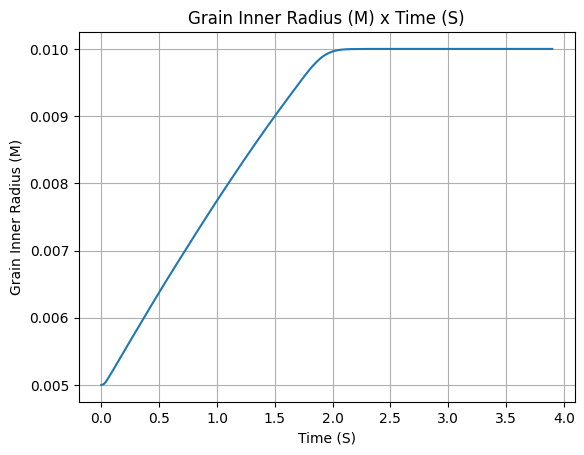

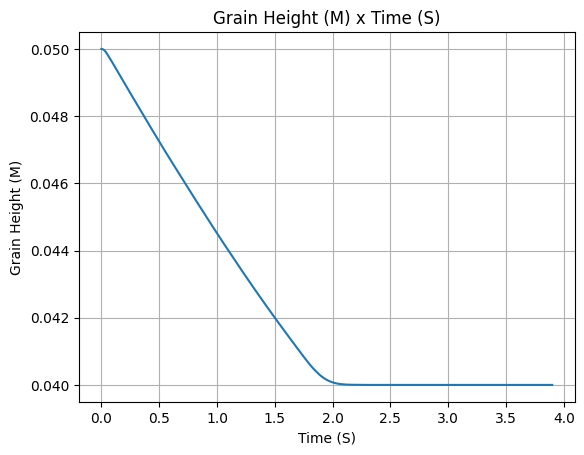

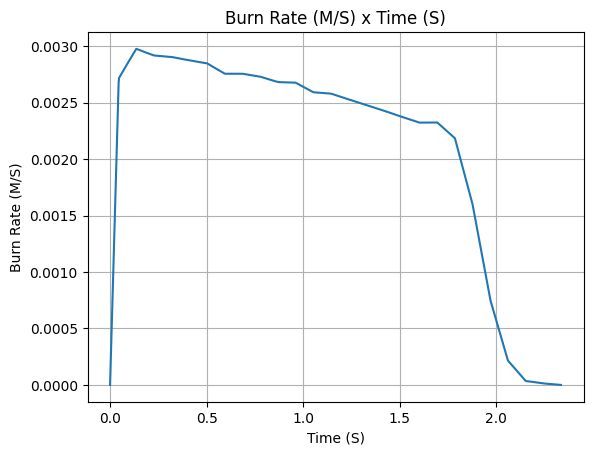

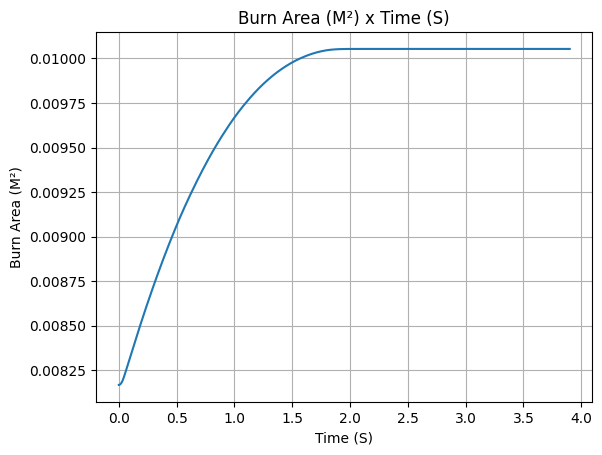

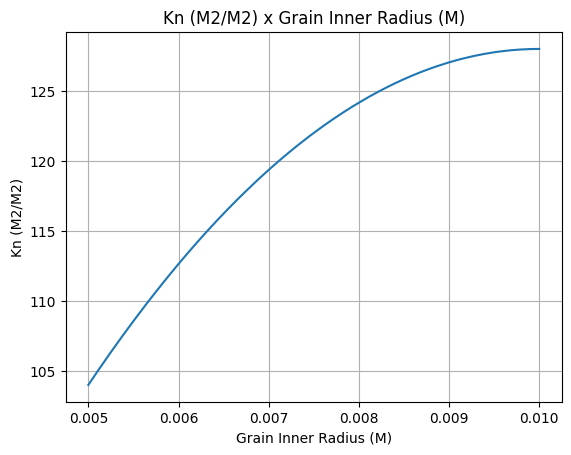

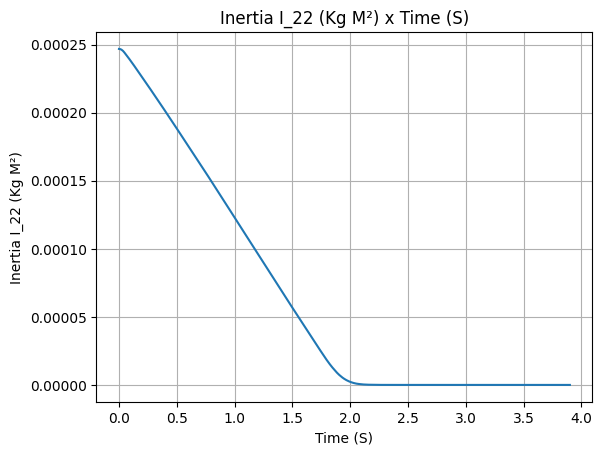

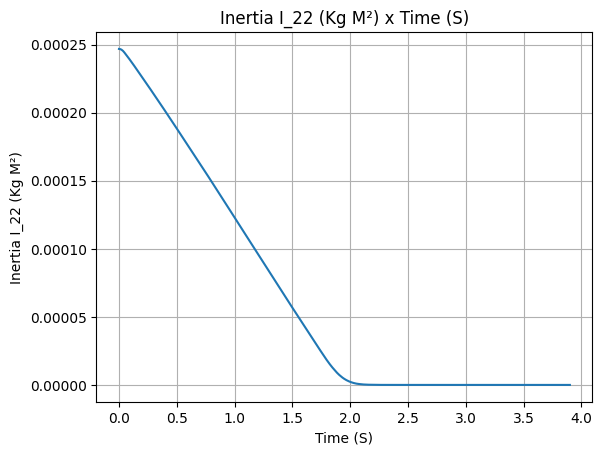

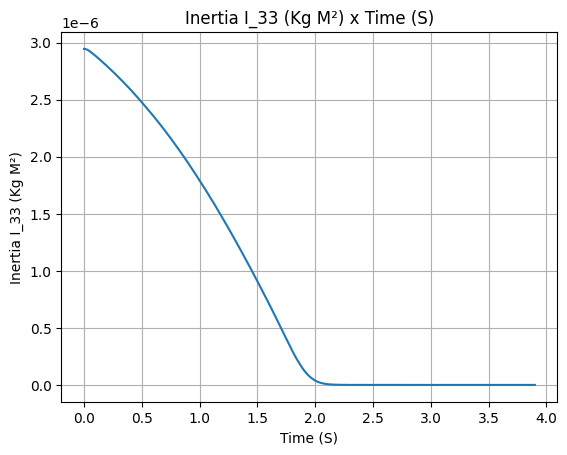

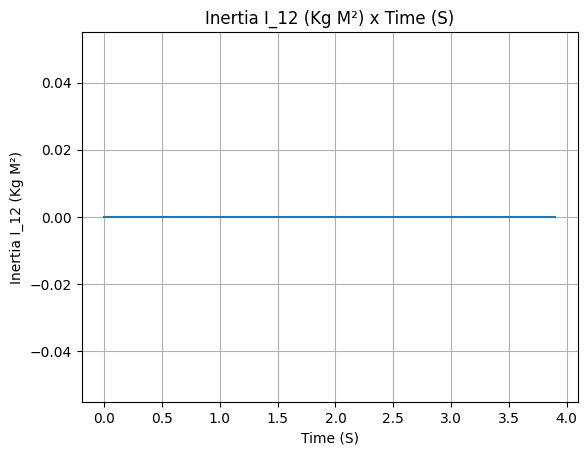

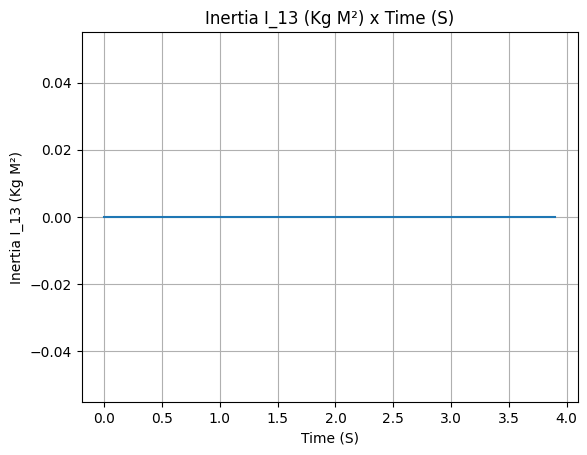

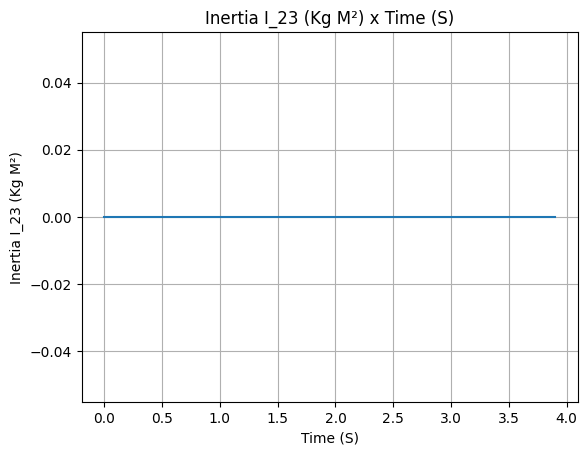


Inertia Details

Rocket Mass: 1.464 kg (without motor)
Rocket Dry Mass: 1.605 kg (with unloaded motor)
Rocket Loaded Mass: 1.652 kg (with loaded motor)
Rocket Inertia (with unloaded motor) 11: 3.343 kg*m2
Rocket Inertia (with unloaded motor) 22: 4.343 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.024 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.0381 m
Rocket Frontal Area: 0.004560 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.036 m
Rocket Center of Dry Mass - Nozzle Exit: 0.529 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.429 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.012 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 4.919/rad

Center of Pressure

Nose Cone Center of Pr

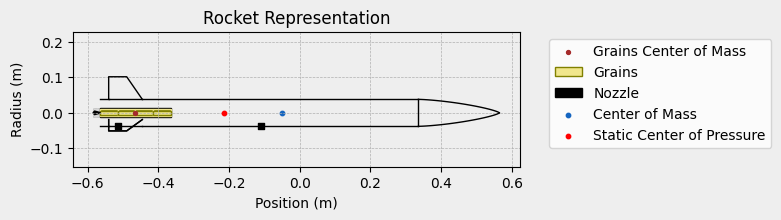


Mass Plots
----------------------------------------


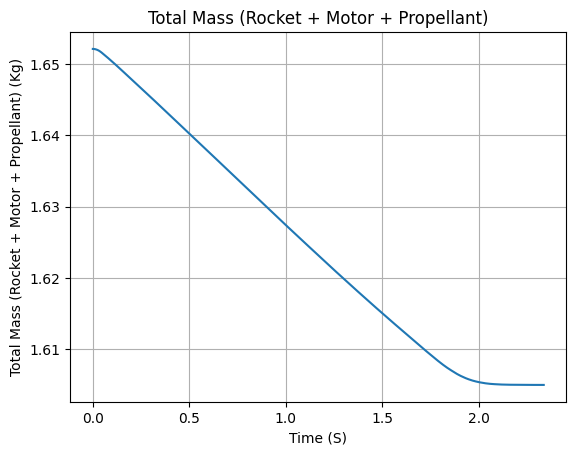

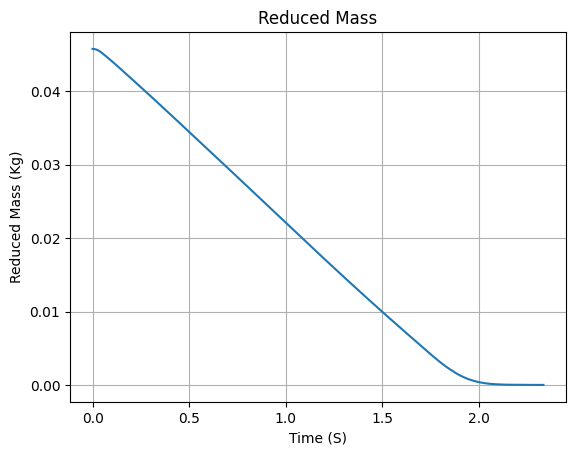


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


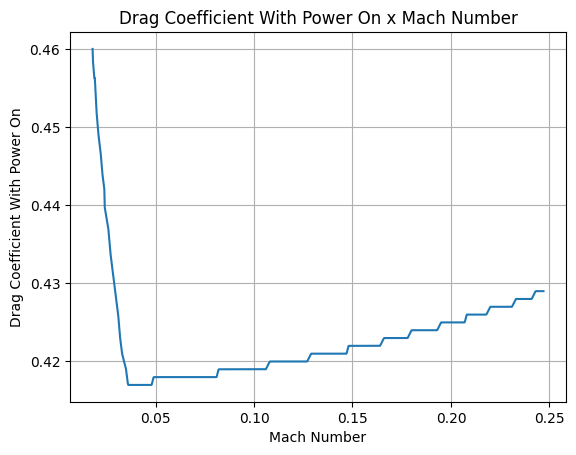

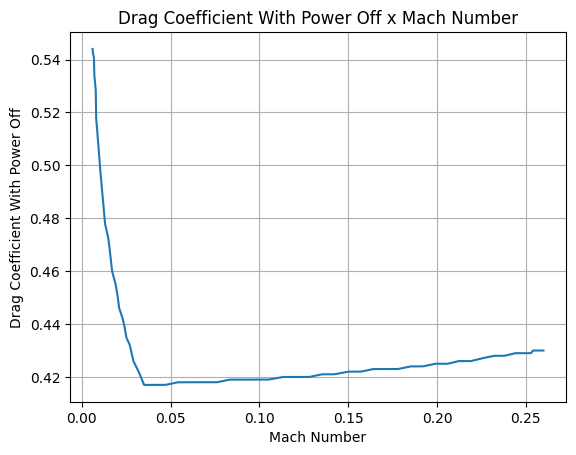


Stability Plots
--------------------


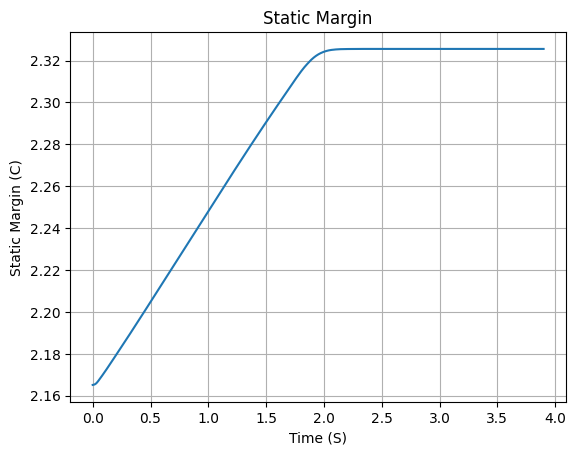

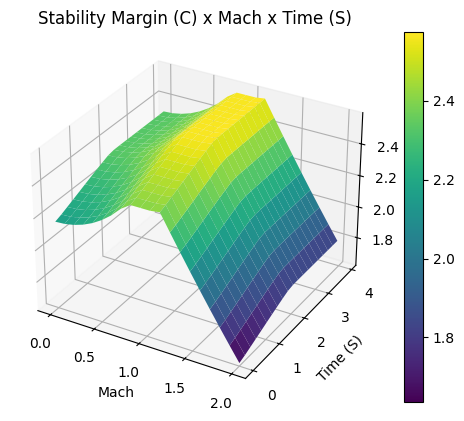


Thrust-to-Weight Plot
----------------------------------------


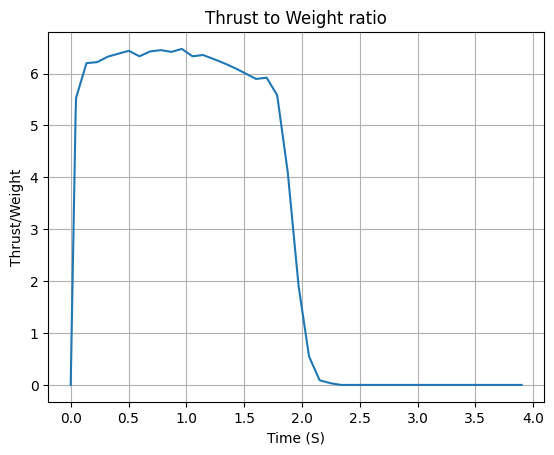

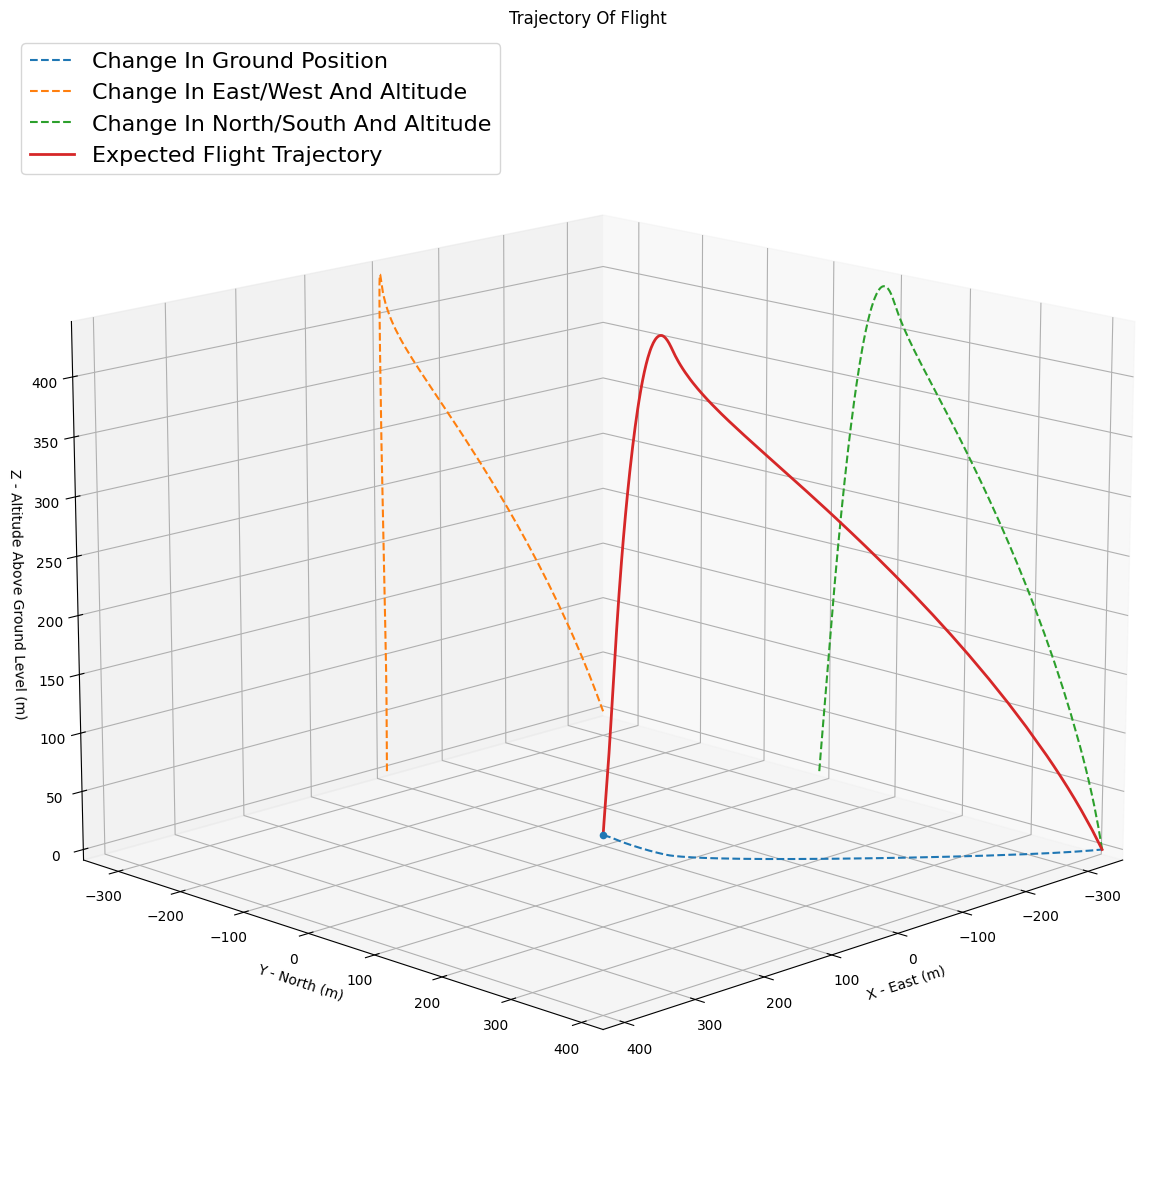

In [5]:
from rocketpy import Environment, SolidMotor, Rocket, Flight

import openpyxl
 
# Define variable to load the dataframe
dataframe = openpyxl.load_workbook("C:\\Users\\mahd\\Documents\\SimulationRocketPy\\WeatherData.xlsx")
 
# Define variable to read sheet
dataframe1 = dataframe.active
 
# Iterate the loop to read the cell values

env = Environment(latitude=33.4328614, longitude=-96.8084617)

import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)
env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time
env.set_atmospheric_model(type="Forecast", file = "GFS")
# env.info()

H97J6 = SolidMotor(
    # MUST CHANGE USER FOR YOURSELF (and probably path too)
    thrust_source= "C:\\Users\\mahd\\Documents\\SimulationRocketPy\\thrustcurve.eng",
    dry_mass=0.141,
    dry_inertia=(0, 0, 0),
    nozzle_radius= 0.001,
    grain_number= 4,
    grain_density= 1000,
    grain_outer_radius= 0.01,
    grain_initial_inner_radius= 0.005,
    grain_initial_height= 0.05,
    grain_separation= 0,
    grains_center_of_mass_position= 0.1,
    center_of_dry_mass_position= 0.15,
    nozzle_position=0,
    burn_time= 3.9,
    throat_radius= 0.005,
    coordinate_system_orientation= "nozzle_to_combustion_chamber",
)


l1Rocket = Rocket(
    radius= 0.0381,
    mass= 1.464,
    inertia=(3.321, 4.321, 0.024),
    power_off_drag="C:\\Users\\mahd\\Documents\\SimulationRocketPy\\L1MotorOn.csv",
    power_on_drag="C:\\Users\\mahd\\Documents\\SimulationRocketPy\\L1MotorOff.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)

rail_buttons = l1Rocket.set_rail_buttons(
    upper_button_position=-0.108,
    lower_button_position=-0.515,
    angular_position=45,
)

l1Rocket.add_motor(H97J6, position=-0.565)

nose_cone = l1Rocket.add_nose(
    length=0.229, kind="vonKarman", position=0.565
)

fin_set = l1Rocket.add_trapezoidal_fins(
    n=3,
    root_chord=0.0952,
    tip_chord=0.051,
    span=0.064,
    position=-0.445,
    cant_angle=0
)

Main = l1Rocket.add_parachute(
    "Main",
    cd_s=0.8,
    trigger="apogee",
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

testFlight = Flight(
    rocket=l1Rocket, environment=env, rail_length=2.2, inclination=84, heading=0
)
col = 1
for row in dataframe1.iter_rows(1, dataframe1.max_row):
        if row[0].value.find("noaa") == -1:
            env.set_atmospheric_model(type="wyoming_sounding", file = row[0].value)
        else:
            env.set_atmospheric_model(type="NOAARucSounding", file = row[0].value)
        testFlight = Flight(rocket=l1Rocket, environment=env, rail_length=2.2, inclination=84, heading=0)
        H97J6.all_info()
        l1Rocket.all_info()
        # testFlight.all_info()
        testFlight.plots.trajectory_3d()
    # ``custom_atmosphere``: sets pressure, temperature, wind-u and wind-v profiles given though the pressure, temperature, wind-u and wind-v parameters of this method. 
        #k570 is engine